# Programmentwurf 1

## Teilaufgabe c)

Test folgender DNF:

$F = M_1 \lor M_2 \lor M_3 \lor M_4 \lor M_5$  
mit den Monomen $M_1, M_2, \dots, M_5$ über den Aussagenvariablen $x_1, x_2, \dots, x_{10}$:

\begin{align*}
M_1 &= x_1 \land x_2 \land x_3 \land \lnot x_4\\
M_2 &= x_2 \land x_3 \land x_4 \land \lnot x_5\\
M_3 &= x_3 \land x_4 \land x_5 \land \lnot x_6\\
M_4 &= x_4 \land x_5 \land x_6 \land \lnot x_7\\
M_5 &= x_7 \land \lnot x_8 \land \lnot x_9 \land \lnot x_{10}\\
\end{align*}

**Dementsprechende Zeilen der Gewichtsmartrix $w$ der Monome:**

\begin{align*}
w_1 &= \begin{pmatrix} 1 & 1 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \end{pmatrix}&\\
w_2 &= \begin{pmatrix} 0 & 1 & 1 & 1 & -1 & 0 & 0 & 0 & 0 & 0 \end{pmatrix}&\\
w_3 &= \begin{pmatrix} 0 & 0 & 1 & 1 & 1 & -1 & 0 & 0 & 0 & 0 \end{pmatrix}&\\
w_4 &= \begin{pmatrix} 0 & 0 & 0 & 1 & 1 & 1 & -1 & 0 & 0 & 0 \end{pmatrix}&\\
w_5 &= \begin{pmatrix} 0 & 0 & 0 & 0 & 0 & 0 & 1 & -1 & -1 & -1 \end{pmatrix}&\\
\end{align*}

So ergeben sich ein Biasvektor $v = \begin{pmatrix} 4 \\ 4 \\ 4 \\ 4 \\ 4 \end{pmatrix}$ und die Gewichtsmartrix $w = \begin{pmatrix} w_1 \\ w_2 \\ w_3 \\ w_4 \\ w_5 \end{pmatrix}$.

Zudem muss die Gewichtsmatrix $W$ folgendermaßen aussehen, damit die Ausgabe $y$ genau dann 1 ist, wenn mindestens eines der Monome den Wert 1 annimmt:
\begin{align*}
W &= \begin{pmatrix} 1 & 1 & 1 & 1 & 1 \end{pmatrix}
\end{align*}

Haben alle Monome den Wert $-1$, so ist die Ausgabe $y = -1$. Andernfalls ist $y = 1$. Mit anderen Worten gilt allgemeingültig für alle Netzwerke dieser Art, dass die Ausgabe $y$ genau dann $1$ ist, wenn mindestens eines der Monome den Wert 1 annimmt. In diesem konkreten Fall mit $m = 5$ Monomen muss der Bias $V$ folglich den Wert $1\cdot 1 + 4 \cdot (-1) \cdot 1 = -3$ annehmen.

In [1]:
from src.net import DNFNet


# Network initialization with random weights and biases
correct_model = DNFNet(input_length=10, num_monomers=5, learning_rate=0.1)

print(correct_model)

Network with 10 inputs and 5 monomers

Monomer 0: Weights = [0.12160692123792538, 0.8212938301073192, -0.6612609315060473, 0.44341322890194024, 0.261897306514266, 0.23856927118651905, -0.35974853178648203, 0.934368838063066, 0.027143306957307045, 0.7086778891407708] Bias = 0.40305348001084673

Monomer 1: Weights = [-0.10075816649120439, 0.34690594984155176, -0.024160289771622878, -0.5176054745994649, -0.02697317645071251, -0.47065753953336076, 0.36306698241937707, -0.9134381626227053, -0.37721074058295434, -0.3633459304778288] Bias = 0.10692966545144156

Monomer 2: Weights = [-0.2953352902616626, -0.7906019142467925, -0.921068381908351, 0.8778568375086062, -0.3975713253294876, -0.7172386764864999, -0.8384666675113553, -0.5095876338472753, 0.6505264670623255, -0.2778535781385739] Bias = 0.7023835147643216

Monomer 3: Weights = [-0.69884711015771, 0.027737963542098898, -0.2008321734063262, -0.6815224062134971, -0.9813338425607476, 0.16474205864325542, -0.7569533999064829, 0.6845204861124

In [2]:
# Set weights and biases to the optimal values from the example

correct_model.monomer_weights = [
    [1, 1, 1, -1, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, -1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, -1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, -1, -1, -1]
]

correct_model.monomer_biases = [4, 4, 4, 4, 4]

correct_model.output_weights = [1, 1, 1, 1, 1]

correct_model.output_bias = -3

print(correct_model)

Network with 10 inputs and 5 monomers

Monomer 0: Weights = [1, 1, 1, -1, 0, 0, 0, 0, 0, 0] Bias = 4

Monomer 1: Weights = [0, 1, 1, 1, -1, 0, 0, 0, 0, 0] Bias = 4

Monomer 2: Weights = [0, 0, 1, 1, 1, -1, 0, 0, 0, 0] Bias = 4

Monomer 3: Weights = [0, 0, 0, 1, 1, 1, -1, 0, 0, 0] Bias = 4

Monomer 4: Weights = [0, 0, 0, 0, 0, 0, 1, -1, -1, -1] Bias = 4

Output weights: [1, 1, 1, 1, 1]
Output bias: -3



Nachdem das Netzwerk nun mit den erforderlichen Parametern konfiguriert wurde, wird ein stichprobenhafter Test durchgeführt.

Die Testeingaben enthalten sowohl positive als auch negative Beispiele. Die positiven Beispiele erfüllen jeweils genau eines der Monome. Es gibt einen Sonderfall, in dem zwei der fünf Monome erfüllt sind.

In [3]:
from copy import deepcopy

# Deepcopy the model before training to compare it later
modelBeforeTraining = deepcopy(correct_model)

test_input_target_pairs = [
    ("M1", [1, 1, 1, -1, 1, 1, 1, 1, 1, 1], 1),
    ("M2", [1, 1, 1, 1, -1, 1, 1, 1, 1, 1], 1),
    ("M3", [1, 1, 1, 1, 1, -1, 1, 1, 1, 1], 1),
    ("M4", [1, 1, 1, 1, 1, 1, -1, 1, 1, 1], 1),
    ("M5", [1, 1, 1, 1, 1, 1, 1, -1, -1, -1], 1),
    ("M1 + M5", [1, 1, 1, -1, 1, 1, 1, -1, -1, -1], 1),
    ("None", [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], -1),
    ("None", [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1], -1),
    ("None", [1, -1, 1, 1, 1, 1, 1, 1, 1, 1], -1),
    ("None", [1, 1, -1, 1, 1, 1, 1, 1, 1, 1], -1),
    ("None", [1, 1, 1, 1, 1, 1, 1, -1, 1, 1], -1),
    ("None", [1, 1, 1, 1, 1, 1, 1, 1, -1, 1], -1),
    ("None", [1, 1, 1, 1, 1, 1, 1, 1, 1, -1], -1)
]

# Testing the network with the test input-target pairs
for tested_monomers, inputs, target in test_input_target_pairs:
    # Inference in train mode to check if the network works as expected
    result, monomer_activations = correct_model(
        inputs = inputs,
        target = target,
        train = True
    )

    if modelBeforeTraining == correct_model:
        # If the network is already correct, no parameters should have changed
        print(f"Test of monomer(-s) {tested_monomers} passed for inputs {inputs} and target {target}")
    else:
        # If the network is incorrect, the inputs, target, inference result and monomer activations will be displayed and the for-loop will break
        print(f"Test failed for inputs {inputs} and target {target}")
        print(f"Expected output: {target}, Actual output: {result}")
        print(f"Monomer activations: {monomer_activations}")
        break

Test of monomer(-s) M1 passed for inputs [1, 1, 1, -1, 1, 1, 1, 1, 1, 1] and target 1
Test of monomer(-s) M2 passed for inputs [1, 1, 1, 1, -1, 1, 1, 1, 1, 1] and target 1
Test of monomer(-s) M3 passed for inputs [1, 1, 1, 1, 1, -1, 1, 1, 1, 1] and target 1
Test of monomer(-s) M4 passed for inputs [1, 1, 1, 1, 1, 1, -1, 1, 1, 1] and target 1
Test of monomer(-s) M5 passed for inputs [1, 1, 1, 1, 1, 1, 1, -1, -1, -1] and target 1
Test of monomer(-s) M1 + M5 passed for inputs [1, 1, 1, -1, 1, 1, 1, -1, -1, -1] and target 1
Test of monomer(-s) None passed for inputs [1, 1, 1, 1, 1, 1, 1, 1, 1, 1] and target -1
Test of monomer(-s) None passed for inputs [-1, 1, 1, 1, 1, 1, 1, 1, 1, 1] and target -1
Test of monomer(-s) None passed for inputs [1, -1, 1, 1, 1, 1, 1, 1, 1, 1] and target -1
Test of monomer(-s) None passed for inputs [1, 1, -1, 1, 1, 1, 1, 1, 1, 1] and target -1
Test of monomer(-s) None passed for inputs [1, 1, 1, 1, 1, 1, 1, -1, 1, 1] and target -1
Test of monomer(-s) None passe

Offensichtlich ist das Netzwerk korrekt implementiert, sodass für die ausgewählten Belegungen kein weiteres Training, d.h. keine Veränderung der Parameter, mehr stattfindet.  

## Teilaufgabe d)

Im nächsten Schritt werden die Parameter des Netzwerks leicht angepasst und dieses trainiert, bis es wieder korrekt funktioniert.  
Hierzu werden in jeder Trainingsepoche alle möglichen Belegungen in den Parametern $x_1, x_2, \dots, x_n$ durchprobiert. Sobald sich das Netzwerk über eine vollständige Epoche hinweg nicht mehr verändert, ist es korrekt trainiert.

Die korrekte Ausgabe für jeden Input wird dabei aus dem bereits korrekt konfigurierten Netzwerk entnommen.

### Zufällige Anpassung der Parameter

In [4]:
from src.helpers import random_adjustment as random

# Initially, copy the parameters of the correct model to the test model
test_net = deepcopy(correct_model)

# Factor for the random adjustments such that they lie in the interval [-factor, +factor]
factor = 0.1

# Random slight adjustments in the interval [-0.1, 0.1] to the parameters of the test model
for i in range(test_net.num_monomers):
    for j in range(test_net.input_length):
        # Adjusting all weights by a random value between 0 and 0.1
        test_net.monomer_weights[i][j] += random(factor)
    # Adjusting all monomer biases by a random value between 0 and 0.1
    test_net.monomer_biases[i] += random(factor)
    
    # Adjusting all output weights by a random value between 0 and 0.1
    test_net.output_weights[i] += random(factor)

# Adjusting the output bias by a random value between 0 and 0.1
test_net.output_bias += random(factor)

# To reuse the same test model later, copy its current state
test_net_copy = deepcopy(test_net)


print(f"Test model: {test_net}")

Test model: Network with 10 inputs and 5 monomers

Monomer 0: Weights = [0.9477256234095033, 1.0034677568808195, 1.016664570523364, -0.907405566616079, -0.08253305678877915, -0.039063927874500796, -0.08197855136775914, 0.02207095428558401, 0.017942901042656813, 0.023778508869747264] Bias = 4.086879979552366

Monomer 1: Weights = [-0.09230259848343562, 1.0608126457733944, 0.9398813986569428, 0.9895779534191568, -0.9228136538810766, 0.011755960732413551, -0.0053886984526524745, -0.016705067211698923, -0.06347132936193173, -0.004806554396927266] Bias = 4.042821023724855

Monomer 2: Weights = [0.0962061236245019, -0.08957556279840104, 0.9761416160612781, 0.9724793956274392, 1.0766104021273282, -0.96795013058545, -0.0026119055629115987, -0.031586137797177664, 0.09586967838342902, 0.050871370503657046] Bias = 3.954357421053491

Monomer 3: Weights = [0.04571002068933816, -0.08460596876888538, 0.05833211833722534, 0.9447970737094838, 1.0392611488770356, 1.0693825763802125, -0.9214485183832551,

### Training des zufällig angepassten Modells

> Lernrate $\eta = 0.1$

Nachdem die Parameter nun leicht verfälscht wurden, wird ein neues Training gestartet.  
Zu erwarten ist eine schnelle Konvergenz aufgrund der nur minimalen Änderungen.

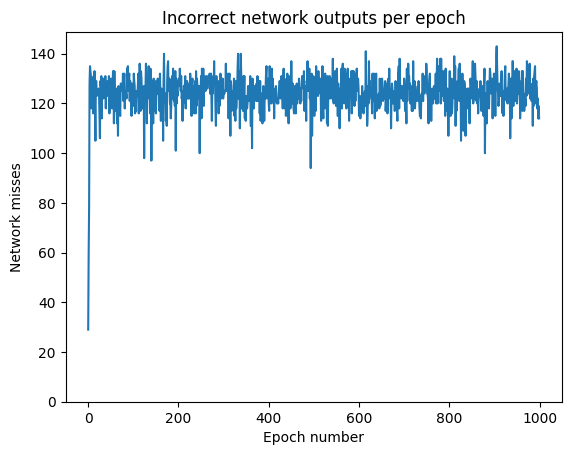

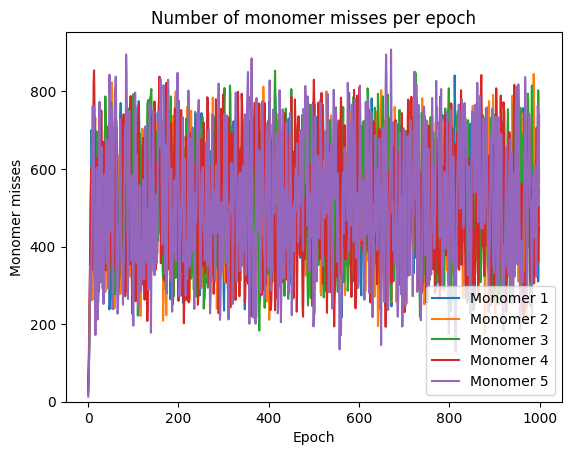

In [5]:
from src.train import supervised_train as train

# Always reset the test model to its initial state before training to ensure reproducibility
test_net = deepcopy(test_net_copy)

# Train the test model to convergence or until the maximum number of 1000 epochs is reached
incorrect_per_epoch, monomer_mistakes_per_epoch = train(correct_model, test_net, max_epochs = 1000)


# Plot the results

import matplotlib.pyplot as plt
from src.helpers import plot_monomer_results, plot_network_results

# Plot the number of incorrect network outputs per epoch
plot_network_results(incorrect_per_epoch)

# Plot the number of monomer mistakes per epoch for each monomer
plot_monomer_results(monomer_mistakes_per_epoch)

Obige Graphen stellen einerseits für das gesamte Netzwerk, andererseits für die einzelnen Monomere die Anzahl der fehlerhaften Ausgaben pro Trainingsepoche dar.

Die Ergebnisse deuten daraufhin, dass keines der Monomere gegen korrekte Parameter konvergiert. Um dies genauer zu untersuchen, werden die Daten durch Berechnung des Simple Moving Average über die letzten 100 Epochen um ihre Volatilität bereinigt und dargestellt:

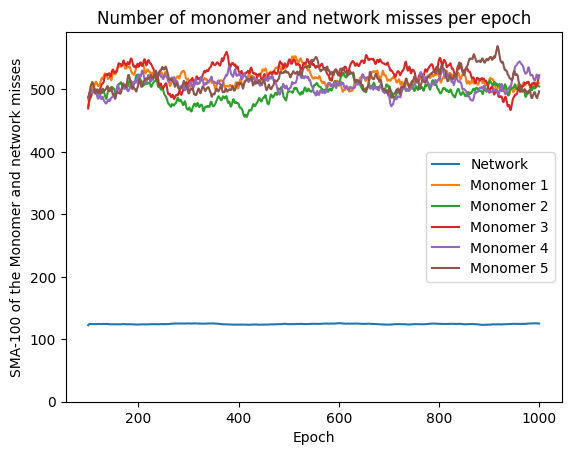

In [6]:
from src.helpers import plot_combined_sma

plot_combined_sma(incorrect_per_epoch, monomer_mistakes_per_epoch, window = 100)

Offenbar findet entgegen der Hypothese keinerlei Konvergenz gegen die korrekte Konfiguration der Paramater statt. Im Gegenteil, die Anzahl fehlerhafter Ergebnisse steigt zu Beginn des Trainings rapide an und stabilisiert sich später auf einem höheren Wert als dem Ausgangsniveau. Das lässt darauf schließen, dass die Lernrate des Netzes zu hoch ist.

Um dies zu überprüfen, wird die Lernrate auf $0.01$ gesetzt und das Netzwerk erneut entweder bis Konvergenz oder für 1000 Epochen trainiert. Die Ergebnisse werden wieder mit derselben Methodik graphisch dargestellt.

### Lernrate $\eta = 0.01$

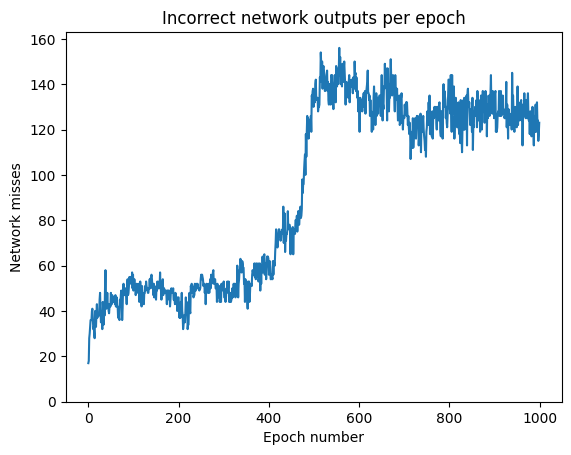

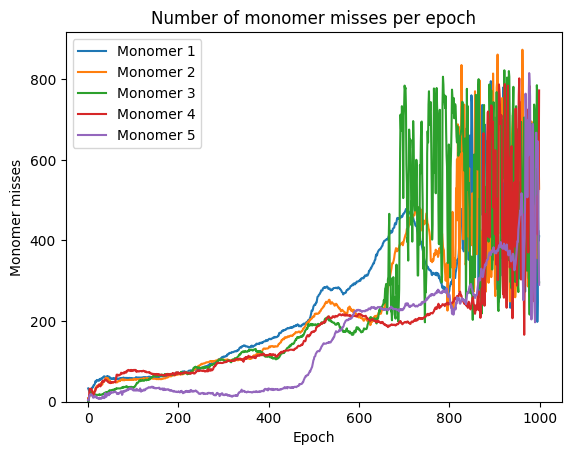

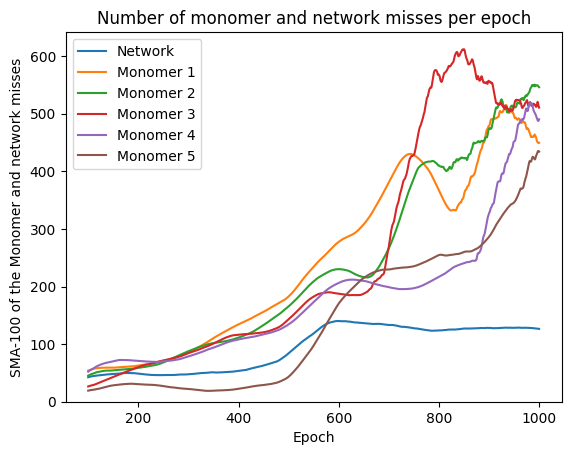

In [7]:
# reset the test_net to its initial configuration since it has already been trained
test_net = deepcopy(test_net_copy)


test_net.learning_rate = 0.01

incorrect_per_epoch, monomer_mistakes_per_epoch = train(
    correct_model,
    test_net,
    max_epochs = 1000
)

from src.helpers import visualize_results
visualize_results(incorrect_per_epoch, monomer_mistakes_per_epoch, window = 100)

Der neue Lernraten-Metaparameter von $0.01$ scheint bereits besser zu funktionieren, da der sprunghafte Anstieg zu Beginn des Trainings nun weniger stark ist. Doch auch hier werden nach einigen Hundert Iterationen für keines der Monomere mehr vielversprechende Fortschritte erzielt, stattdessen kommt es zu einer starken Oszillation der Fehlerhäufigkeit der Monome.  
Daher wird nun eine Lernrate weiter verringert, nun auf $0.001$.

### Lernrate $\eta = 0.001$

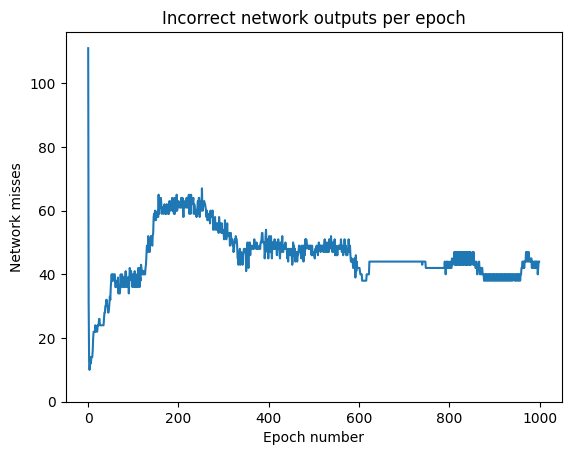

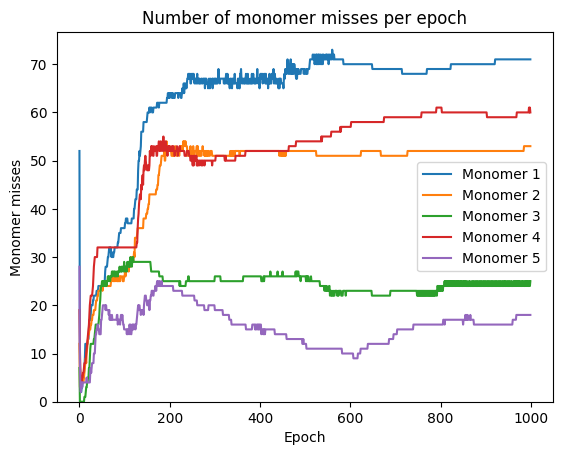

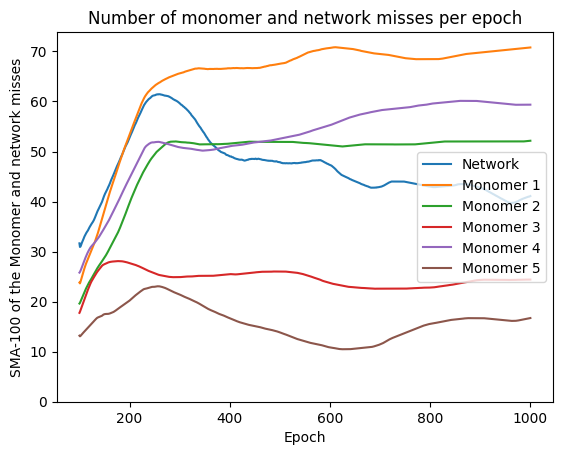

In [8]:
test_net = deepcopy(test_net_copy)

test_net.learning_rate = 0.001

incorrect_per_epoch, monomer_mistakes_per_epoch = train(
    correct_model,
    test_net,
    max_epochs = 1000
)

visualize_results(incorrect_per_epoch, monomer_mistakes_per_epoch, window = 100)

Zwar konvergiert das Netzwerk immer noch nicht dauerhaft gegen eine korrekte Lösung. Doch die Anzahl der inkorrekt berechneten Belegungen sinkt zu Beginn des Trainings nun erstmals und es wird fast eine stabile Konfiguration erreicht. Auch die Anzahl der falsch berechneten Monomere ist im Vergleich zum vorherigen Durchlauf auf einen Bruchteil gesunken.  
Das "Stufenmuster", das sich an verschiedenen Stellen des Graphen ergibt, deutet auf ein allmählicheres Lernverhalten mit Kipppunkten hin. Diese Kipppunkte könnten durch die verwendete Signum-Aktivierungsfunktion hervorgerufen werden, die sich nich stetig verhält.

Darüber lassen sich auch die "Rechtecke" im Graphen erklären, die sowohl für einzelne Monome als auch für das Netzwerk als ganzes auftreten. Hier haben die Parameter Konfigurationen, die nah an den Kipppunkten liegen, sodass die Werte der Aktivierungsfunktion durch die Lernfunktion zwischen den beiden möglichen Ausgaben $+1$ und $-1$ oszillieren.

Da mit der Lernrate $\eta = 0.001$ erstmals zu Trainingsbeginn zeitweise eine beinahe fehlerfreie Einstellung des Netzwerkes erreicht wird, empfiehlt sich eine weitere Reduktion der Lernrate.

### Lernrate $\eta = 0.0001$

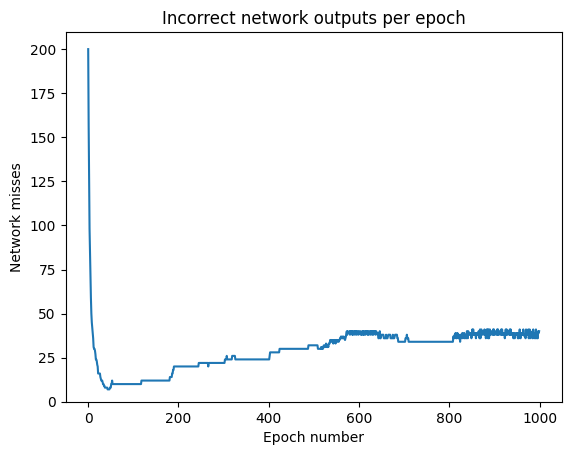

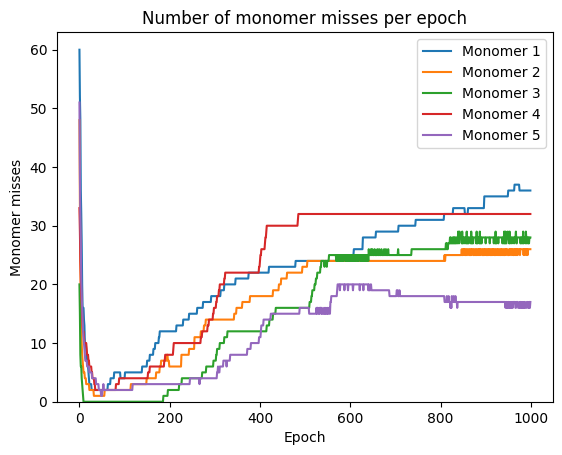

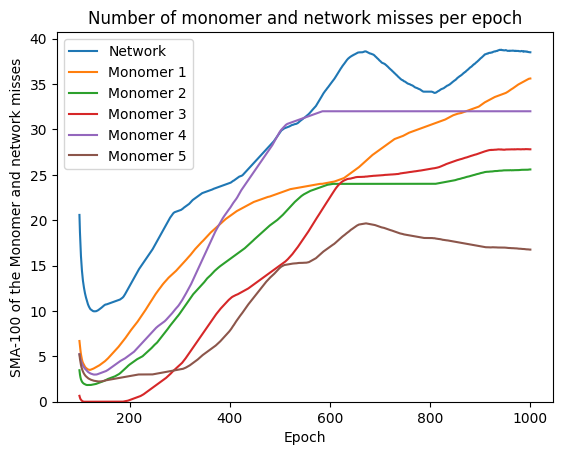

In [9]:
test_net = deepcopy(test_net_copy)

test_net.learning_rate = 0.0001

incorrect_per_epoch, monomer_mistakes_per_epoch = train(
    correct_model,
    test_net,
    max_epochs = 1000
)

visualize_results(incorrect_per_epoch, monomer_mistakes_per_epoch, window = 100)

Mit dem Metaparameter $\eta = 0.0001$ ergibt sich ein vielversrechender Trend, bei dem beinahe ein optimaler Zustand erzielt wird. Die Anzahl der fehlerhaften Monomerausgaben liegt nun nur noch im Bereich um 30, etwas weniger als im vorherigen Durchlauf mit 50.

Daher wird ein weiterer Test mit $\eta = 0.00001$ durchgeführt.

### Lernrate $\eta = 0.00001$

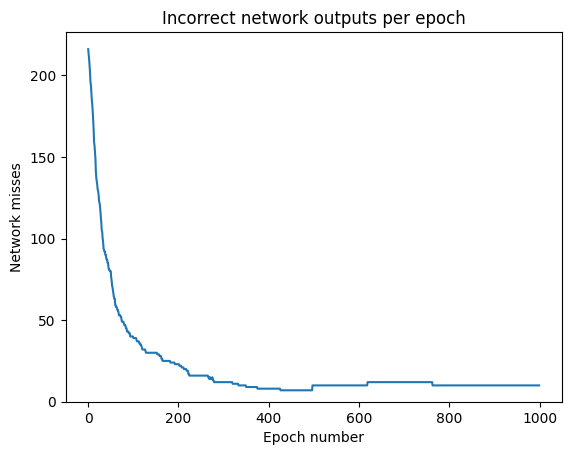

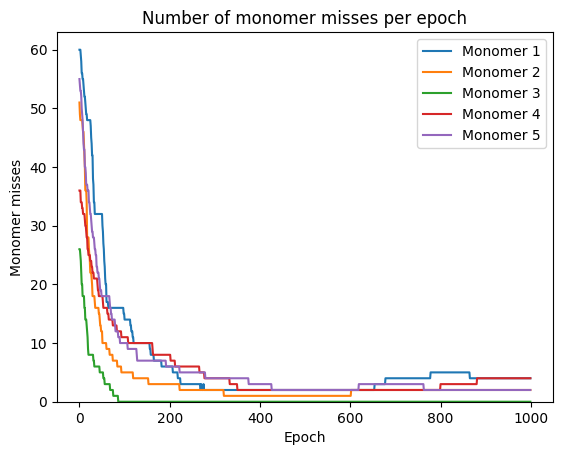

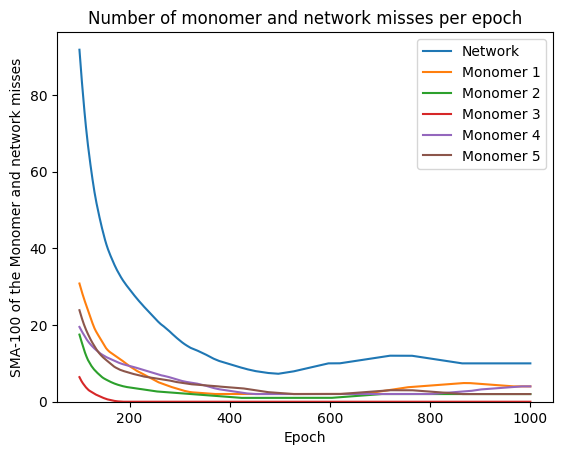

In [10]:
test_net = deepcopy(test_net_copy)

test_net.learning_rate = 0.00001

incorrect_per_epoch, monomer_mistakes_per_epoch = train(
    correct_model,
    test_net,
    max_epochs = 1000
)

visualize_results(incorrect_per_epoch, monomer_mistakes_per_epoch, window = 100)

Dieses Ergebnis lässt eindeutig auf eine Konvergenz gegen einen Wert nahe dem optimalen Zustand schließen. Die Anzahl der fehlerhaften Monomerausgaben liegt für alle Monomere unter 10, daher wird das Netz nun erneut mit derselben Lernrate von on $\eta = 0.00001$ trainiert, diesmal mit einer Obergrenze von 10000 Epochen. Erwartet wird ein Trainingsabbruch durch Erreichen eines stabilen Optimums, bei dem sich die aufgrund korrekter Ergebnisse eine ganze Epoche lang nicht mehr verändern.

### Lernrate $\eta = 0.00001$ mit maximal 10000 Epochen

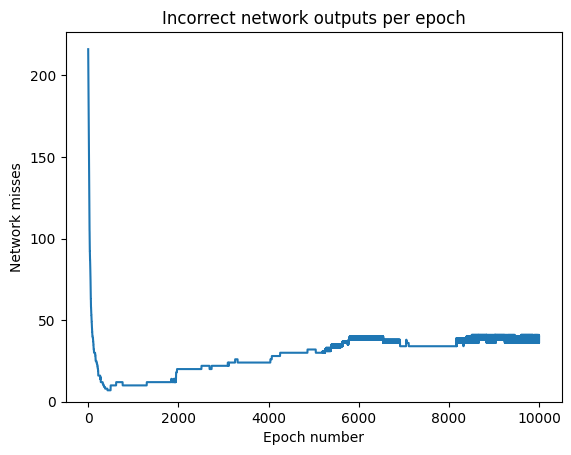

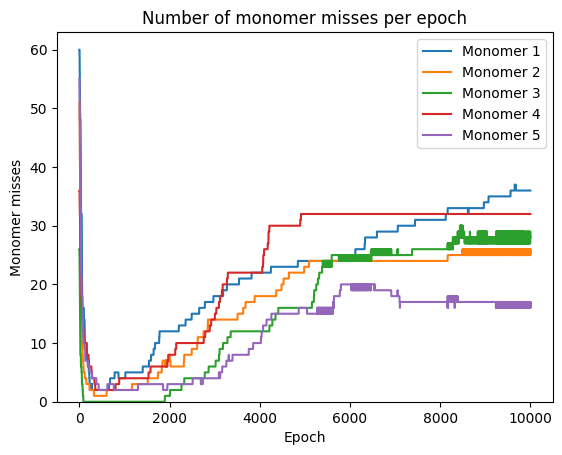

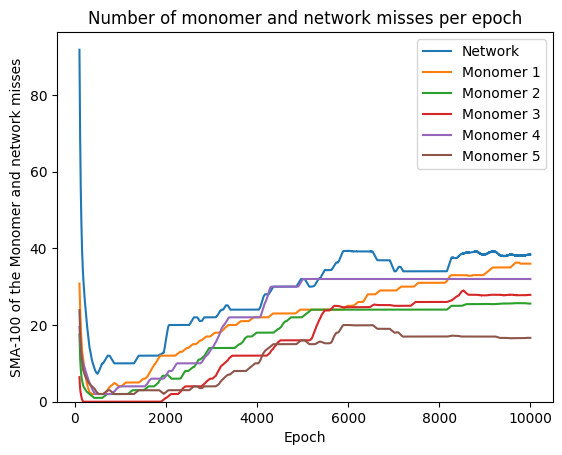

In [11]:
test_net = deepcopy(test_net_copy)

test_net.learning_rate = 0.00001

incorrect_per_epoch, monomer_mistakes_per_epoch = train(
    correct_model,
    test_net,
    max_epochs = 10000
)

visualize_results(incorrect_per_epoch, monomer_mistakes_per_epoch, window = 100)

Die formulierte Hypothese, das Netzwerk würde nun einen stabilen Zustand erreichen, bestätigt sich nicht.  
Es lässt sich spekulieren, dass die Parameter bereits fehlerfreier Monome durch fehlerhafte Netzwerkausgaben so lang weiter angepasst wurden, bis diese wieder falsche Ergebnisse liefern und dadurch wieder häufiger vorkommende Fehler die Anpassung der Parameter wieder in eine falsche Richtung lenken.  


### Training in zwei Etappen

Insofern bietet es sich an, das Training in zwei Etappen zu gliedern: 
1. Trainieren mit $\eta = 0.00001$ bis zum Erreichen eines beinahe stabilen Zustandes, in diesem Fall 1000 Trainingsepochen
2. Trainieren mit $\eta = 0.000001$ bis Konvergenz bzw. für maximal 10000 Trainingsepochen

Graphisch dargestellt wird hierbei nur das Training in der zweiten Etappe, da das der ersten Etappe bereits oben visualisiert wird und da die dort noch vergleichweise hohe Anzahl inkorrekter Ergbnisse die Darstellung der zweiten Etappe beeinträchtigen würde.

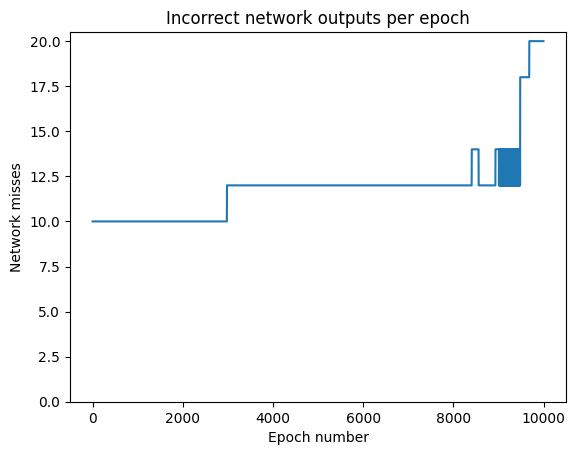

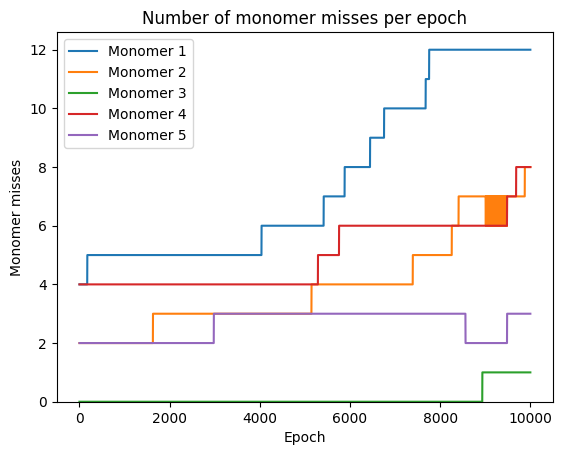

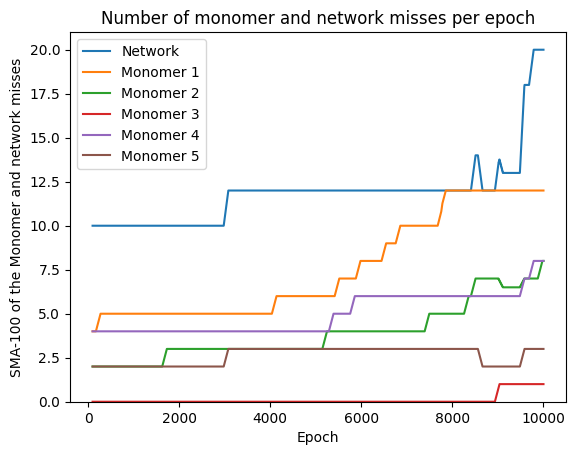

In [16]:
test_net = deepcopy(test_net_copy)

test_net.learning_rate = 0.00001

incorrect_per_epoch, monomer_mistakes_per_epoch = train(
    correct_model,
    test_net,
    max_epochs = 1000
)

test_net.learning_rate = 0.000001

incorrect_per_epoch, monomer_mistakes_per_epoch = train(
    correct_model,
    test_net,
    max_epochs = 10000
)



visualize_results(incorrect_per_epoch, monomer_mistakes_per_epoch, window = 100)

Die "blockartigen" Verläufe der Graphen bedeuten auch hier wieder eine Oszillation der Fehlerhäufigkeit innerhalb eines Intervalls durch Sprünge zwischen zwei um einen Kipppunkt liegenden Konfigurationen.  

Das deutet darauf hin, dass die Lernfunktion möglicherweise nicht für den Anwendungsfall, eine DNF zu erlernen, geeignet ist.



### Zufällige Parameter
Um die Eignung der Lernfunktion zu überprüfen, wird das Training nun an einem rein zufällig initialisierten Netz geprüft:

In [18]:
random_net = DNFNet(input_length=10, num_monomers=5, learning_rate=0.01)

print(random_net)

Network with 10 inputs and 5 monomers

Monomer 0: Weights = [0.3736371520716756, 0.9911264454071865, 0.005810163162913162, -0.4941221353469638, 0.8238599391215625, 0.530406231359677, -0.3798766722076419, -0.1419628601243409, 0.24769753193985322, 0.11533084321517528] Bias = -0.5278136635533195

Monomer 1: Weights = [0.4649344501741187, 0.08328727327977559, 0.8212196311835434, -0.033396318506614064, 0.272729200751317, -0.42554890731177386, 0.6861599165445109, -0.08303692904097426, 0.6980813585201996, -0.2677982920350117] Bias = -0.8298494153428554

Monomer 2: Weights = [0.6774946612175208, -0.964990475525951, -0.4670624105991483, 0.28252461309236054, -0.5083061360085899, 0.17986829136817306, -0.5443151770796848, 0.4211277059072879, -0.4386791323522047, 0.4626907088538724] Bias = 0.9769171983623852

Monomer 3: Weights = [0.21287992784760856, 0.49463247721885706, -0.060388974758076364, -0.5715590775894323, 0.41382066298239806, -0.34407338067192195, -0.1342879752673094, -0.4721483377366088,

Um schneller eine vielversprechende Lernrate zu finden, wird vorerst nur der SMA der Fehlerhäufigkeit für das gesamte Netzwerk visualisiert:

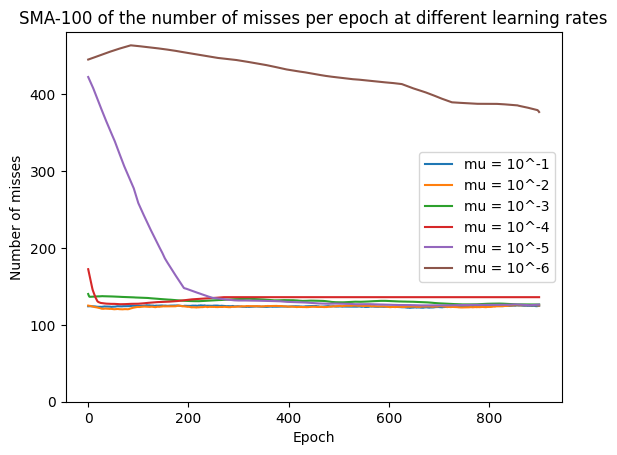

In [19]:
from src.helpers import plot_several_networks

random_net_copy = deepcopy(random_net)

network_mistakes = []
names = []

for i in range(1, 7):
    # Learning rate 10^(-i)
    random_net = deepcopy(random_net_copy)
    random_net.learning_rate = 10**(-i)
    incorrect_per_epoch, monomer_mistakes_per_epoch = train(
        correct_model,
        random_net,
        max_epochs = 1000
    )
    network_mistakes.append(incorrect_per_epoch)
    names.append(f"mu = 10^-{i}")


plot_several_networks(network_mistakes, names, window = 100)

Mit der Lernrate $\eta = 10^{-6}$ ergibt sich eine beinahe streng monoton fallende Kurve, während die anderen Lernraten schneller ein lokales Minimum erzielen und dann stagnieren.  

Insofern scheint eine Kombination aus den Lernraten $\eta = 10^{-2}$ nach dem oben eingeführten Etappen-Modell sinnvoll, mit 100 Epochen in der ersten Etappe.

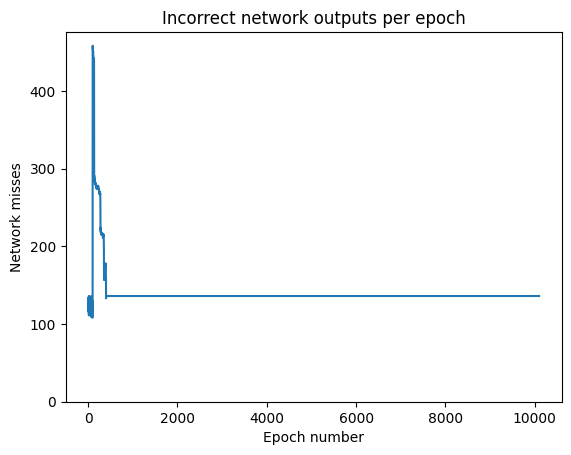

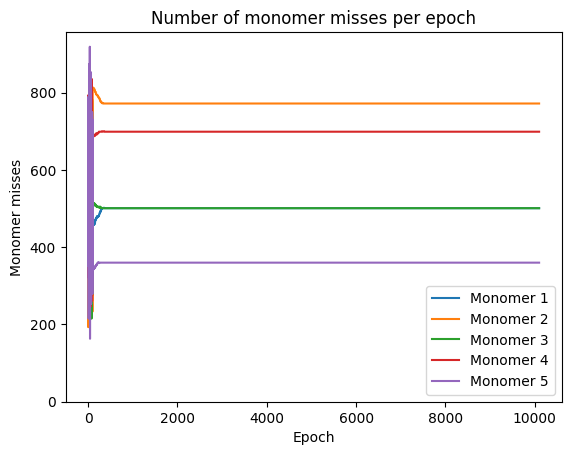

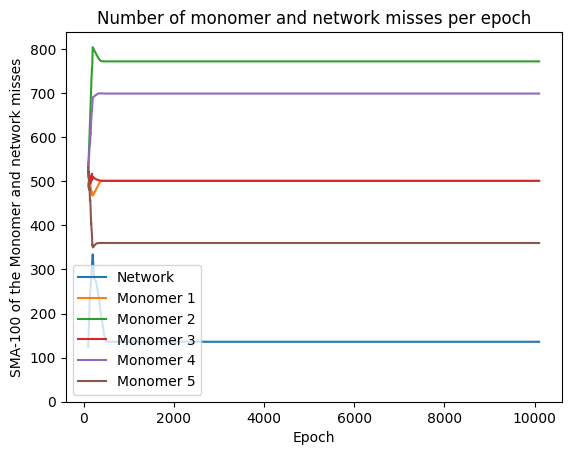

In [20]:
random_net = deepcopy(random_net_copy)

random_net.learning_rate = 10e-2
incorrect_per_epoch_1, monomer_mistakes_per_epoch_1 = train(
    correct_model,
    random_net,
    max_epochs = 100
)

random_net.learning_rate = 10e-6
incorrect_per_epoch_2, monomer_mistakes_per_epoch_2 = train(
    correct_model,
    random_net,
    max_epochs = 10000
)

incorrect_per_epoch = incorrect_per_epoch_1 + incorrect_per_epoch_2


monomer_mistakes_per_epoch = []
for i, monomer in enumerate(monomer_mistakes_per_epoch_1):
    monomer_mistakes_per_epoch.append(monomer + monomer_mistakes_per_epoch_2[i])

visualize_results(incorrect_per_epoch, monomer_mistakes_per_epoch, window=100)

Für ein zufällig instanziiertes Netzwerk führen also sowohl besonders große, als auch kleinere Lernraten schließlich zu einer statischen Konfiguration des Netzwerks.

Das kann daran liegen, dass der Lernalgorithmus nicht gut auf das Problem angepasst ist.

Hierzu noch einmal der Lernalgorithmus mit Zielmuster $p$ und Lernrate $\eta$:
  - $\Delta W_{1j} = \eta \cdot (p-y)\cdot z_j$
  - $\Delta w_{jk} = \eta \cdot W_{1j}\cdot (p-y) \cdot x_k$
  - $\Delta V = - \eta \cdot (p-y)$
  - $\Delta v_{j} = - \eta \cdot (p-y) \cdot W_{1j}$

In allen vier Gleichungen ist $\eta$ derselbe statische Wert. Weiterhin verhält sich der Term $(p-y)$ folgendermaßen:

| $p$ | $y$ | $p-y$ |
| --- | --- | ----- |
| -1  | -1  |   0   |
| -1  | 1   |  -2   |
| 1   | -1  |   2   |
| 1   | 1   |   0   |

$x_k$ und $z_j$ sind ebenfalls stets Werte aus $\{-1, 1\}$ und lediglich $W_{1j}$ stammt aus $\mathbb{R}$.

Das bedeutet, dass es für $\Delta W_{1j}$, $\Delta w_{jk}$, und $\Delta V$ nur eine diskrete Menge an Werten gibt, die sie annehmen können. Hieraus folgt, dass auch $W_{1j}$, $w_{jk}$ und $V$ nur Werte einer jeweiligen diskreten Menge in Abhängigkeit vom Initialzustand annehmen können, und implizit somit auch $\vec{v}$.

Letztlich führt dies dazu, dass es unter Umständen unmöglich ist, überhaupt eine Lösung anzulernen, da die Gewichte und Schwellwerte nicht kontinuierlich angepasst werden können.

Abhilfe könnte womöglich durch einen in jeder Lerniteration zufällig erzeugten Koeffizienten $\epsilon$ geschaffen werden.

Eine andere Lösung könnte in der Verwendung einer kontinuierlichen Aktivierungsfunktion im Trainingsvorgang bestehen. Das würde zwar die Bedingung verletzen, eine Ausgabe in $\{-1, 1\}$ zu berechnen. Dementsprechend müsste hierzu die Funktionalität zur Unterscheidung zwischen der Inferenz im Training mit einer kontinuierlichen Aktivierungsfunktion und der Inferenz im Betrieb mit einer binären Aktivierungsfunktion implementiert werden.  
Beispielsweise könnte eventuell eine Abwandlung der Sigmoid-Funktion mit kontinuierlicher Ausgabe im Intervall $(-1, 1)$ verwendet werden.